# Kobe Bryant Shot Selection

In [1]:
# Required packages: Numpy, Pandas and Scikit-Learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [2]:
data_cl = pd.read_csv("data/data_cl.csv")

In [3]:
# Convert shot made flag to categorical and print the dataset info
data_cl["shot_made_flag"] = data_cl["shot_made_flag"].astype('category')
data_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5956 entries, 0 to 5955
Columns: 148 entries, loc_x to period#Others
dtypes: category(1), float64(4), int64(143)
memory usage: 6.7 MB


In [4]:
# Split the dataset in train and test. Also separing features from target (Pandas to numpy array at the end)
X = data_cl.drop(['shot_made_flag'], axis=1).as_matrix()
y = data_cl.shot_made_flag.as_matrix()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [5]:
# Setup the k-fold cross validation
k_folds = 10
kf = KFold(n_splits=k_folds, shuffle = True, random_state = 1234)

## Apply the models

### Naive Bayes

In [6]:
count = 0
accuracy = 0
cm = 0
prfs = 0

for train_idx, test_idx in kf.split(X_train):
    count += 1
    # Separe training and test in the Training set for k-Fold
    fold_Xtrain, fold_Xtest = X_train[train_idx], X_train[test_idx]
    fold_ytrain, fold_ytest = y_train[train_idx], y_train[test_idx]
    
    # Train
    clf = GaussianNB()
    clf.fit(fold_Xtrain, fold_ytrain)
    pred = clf.predict(fold_Xtest)
    accuracy += accuracy_score(fold_ytest, pred)*100
    cm += confusion_matrix(fold_ytest, pred)
    prfs += np.asarray(precision_recall_fscore_support(fold_ytest, pred))*100
    
print("Average statistics: ")
print("")
print("Accuracy = %s%%" % '{0:.2f}'.format(accuracy/k_folds))
print("Precision = No: %s%% , Yes: %s%%" % ('{0:.2f}'.format(prfs[0,0]/k_folds), '{0:.2f}'.format(prfs[0,1]/k_folds)))
print("Recall = No: %s%% , Yes: %s%%" % ('{0:.2f}'.format(prfs[1,0]/k_folds), '{0:.2f}'.format(prfs[1,1]/k_folds)))
print("F1-score = No: %s%% , Yes: %s%%" % ('{0:.2f}'.format(prfs[2,0]/k_folds), '{0:.2f}'.format(prfs[2,1]/k_folds)))
print("Support = No: %s , Yes: %s" % (int(prfs[3,0]/k_folds), int(prfs[3,1]/k_folds)))
print("")
print("Confusion-Matrix: ")
print(cm)   

Average statistics: 

Accuracy = 62.11%
Precision = No: 59.88% , Yes: 76.21%
Recall = No: 90.77% , Yes: 29.09%
F1-score = No: 71.85% , Yes: 40.63%
Support = No: 25580 , Yes: 22060

Confusion-Matrix: 
[[2320  238]
 [1567  639]]


### kNN

Average statistics: 

Best k = 50
Accuracy = 62.78%
Precision = No: 61.26% , Yes: 67.04%
Recall = No: 83.68% , Yes: 38.61%
F1-score = No: 70.69% , Yes: 48.90%
Support = No: 25580 , Yes: 22060

Confusion-Matrix: 
[[2140  418]
 [1355  851]]


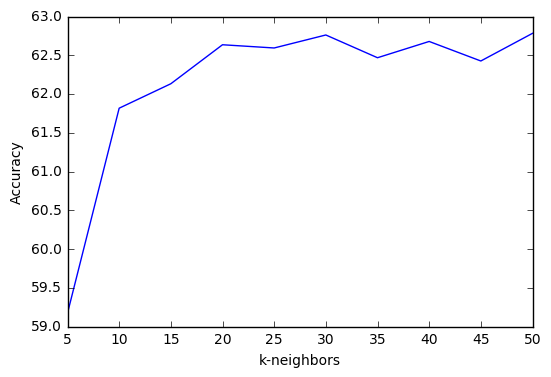

In [7]:
hist_accuracy = []
best_k = -1
k_neig = [5,10,15,20,25,30,35,40,45,50]
best_accuracy = 0
# Optimize k
for k in k_neig :
    count = 0
    accuracy = 0
    cm = 0
    prfs = 0

    for train_idx, test_idx in kf.split(X_train):
        count += 1
        # Separe training and test in the Training set for k-Fold
        fold_Xtrain, fold_Xtest = X_train[train_idx], X_train[test_idx]
        fold_ytrain, fold_ytest = y_train[train_idx], y_train[test_idx]

        # Train
        clf = neighbors.KNeighborsClassifier(n_neighbors=k)
        clf.fit(fold_Xtrain, fold_ytrain)
        pred = clf.predict(fold_Xtest)
        accuracy += accuracy_score(fold_ytest, pred)*100
        cm += confusion_matrix(fold_ytest, pred)
        prfs += np.asarray(precision_recall_fscore_support(fold_ytest, pred))*100
    
    hist_accuracy.append(accuracy/k_folds)
    if accuracy >= best_accuracy:
        best_k = k
        best_accuracy = accuracy
        best_prfs = prfs
        best_cm = cm
    
print("Average statistics: ")
print("")
print("Best k = %s" % best_k)
print("Accuracy = %s%%" % '{0:.2f}'.format(best_accuracy/k_folds))
print("Precision = No: %s%% , Yes: %s%%" % ('{0:.2f}'.format(best_prfs[0,0]/k_folds), '{0:.2f}'.format(best_prfs[0,1]/k_folds)))
print("Recall = No: %s%% , Yes: %s%%" % ('{0:.2f}'.format(best_prfs[1,0]/k_folds), '{0:.2f}'.format(best_prfs[1,1]/k_folds)))
print("F1-score = No: %s%% , Yes: %s%%" % ('{0:.2f}'.format(best_prfs[2,0]/k_folds), '{0:.2f}'.format(best_prfs[2,1]/k_folds)))
print("Support = No: %s , Yes: %s" % (int(best_prfs[3,0]/k_folds), int(best_prfs[3,1]/k_folds)))
print("")
print("Confusion-Matrix: ")
print(best_cm)

# Plot k over iter
plt.plot(k_neig, hist_accuracy)
plt.ylabel('Accuracy')
plt.xlabel('k-neighbors')
plt.show()

### Logistic Regression

In [8]:
count = 0
accuracy = 0
cm = 0
prfs = 0

for train_idx, test_idx in kf.split(X_train):
    count += 1
    # Separe training and test in the Training set for k-Fold
    fold_Xtrain, fold_Xtest = X_train[train_idx], X_train[test_idx]
    fold_ytrain, fold_ytest = y_train[train_idx], y_train[test_idx]
    
    # Train
    clf = linear_model.LogisticRegression()
    clf.fit(fold_Xtrain, fold_ytrain)
    pred = clf.predict(fold_Xtest)
    accuracy += accuracy_score(fold_ytest, pred)*100
    cm += confusion_matrix(fold_ytest, pred)
    prfs += np.asarray(precision_recall_fscore_support(fold_ytest, pred))*100
    
print("Average statistics: ")
print("")
print("Accuracy = %s%%" % '{0:.2f}'.format(accuracy/k_folds))
print("Precision = No: %s%% , Yes: %s%%" % ('{0:.2f}'.format(prfs[0,0]/k_folds), '{0:.2f}'.format(prfs[0,1]/k_folds)))
print("Recall = No: %s%% , Yes: %s%%" % ('{0:.2f}'.format(prfs[1,0]/k_folds), '{0:.2f}'.format(prfs[1,1]/k_folds)))
print("F1-score = No: %s%% , Yes: %s%%" % ('{0:.2f}'.format(prfs[2,0]/k_folds), '{0:.2f}'.format(prfs[2,1]/k_folds)))
print("Support = No: %s , Yes: %s" % (int(prfs[3,0]/k_folds), int(prfs[3,1]/k_folds)))
print("")
print("Confusion-Matrix: ")
print(cm)

Average statistics: 

Accuracy = 66.46%
Precision = No: 64.23% , Yes: 71.93%
Recall = No: 84.69% , Yes: 45.29%
F1-score = No: 73.02% , Yes: 55.49%
Support = No: 25580 , Yes: 22060

Confusion-Matrix: 
[[2166  392]
 [1206 1000]]


### Support Vector Machine

C:\Users\Heitor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Average statistics: 

Best C = 20
Accuracy = 54.72%
Precision = No: 52.79% , Yes: 64.54%
Recall = No: 73.58% , Yes: 29.78%
F1-score = No: 55.48% , Yes: 22.62%
Support = No: 25580 , Yes: 22060

Confusion-Matrix: 
[[1916  642]
 [1515  691]]


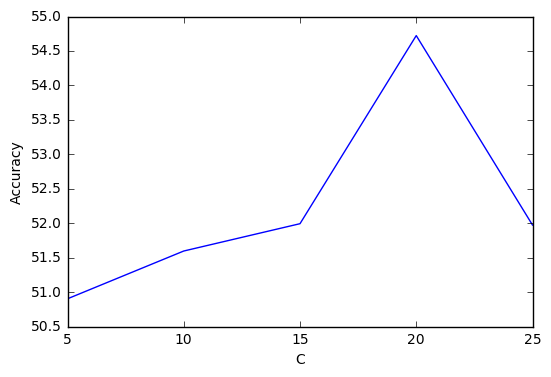

In [9]:
hist_accuracy = []
best_C = -1
C = [5, 10, 15, 20, 25]
best_accuracy = 0

# Optimize k
for current_c in C :
    count = 0
    accuracy = 0
    cm = 0
    prfs = 0

    for train_idx, test_idx in kf.split(X_train):
        count += 1
        # Separe training and test in the Training set for k-Fold
        fold_Xtrain, fold_Xtest = X_train[train_idx], X_train[test_idx]
        fold_ytrain, fold_ytest = y_train[train_idx], y_train[test_idx]

        # Train
        clf = svm.LinearSVC(C=current_c, max_iter = 10000)
        clf.fit(fold_Xtrain, fold_ytrain)
        pred = clf.predict(fold_Xtest)
        accuracy += accuracy_score(fold_ytest, pred)*100
        cm += confusion_matrix(fold_ytest, pred)
        prfs += np.asarray(precision_recall_fscore_support(fold_ytest, pred))*100
    
    hist_accuracy.append(accuracy/k_folds)
    if accuracy >= best_accuracy:
        best_C = current_c
        best_accuracy = accuracy
        best_prfs = prfs
        best_cm = cm
    
print("Average statistics: ")
print("")
print("Best C = %s" % best_C)
print("Accuracy = %s%%" % '{0:.2f}'.format(best_accuracy/k_folds))
print("Precision = No: %s%% , Yes: %s%%" % ('{0:.2f}'.format(best_prfs[0,0]/k_folds), '{0:.2f}'.format(best_prfs[0,1]/k_folds)))
print("Recall = No: %s%% , Yes: %s%%" % ('{0:.2f}'.format(best_prfs[1,0]/k_folds), '{0:.2f}'.format(best_prfs[1,1]/k_folds)))
print("F1-score = No: %s%% , Yes: %s%%" % ('{0:.2f}'.format(best_prfs[2,0]/k_folds), '{0:.2f}'.format(best_prfs[2,1]/k_folds)))
print("Support = No: %s , Yes: %s" % (int(best_prfs[3,0]/k_folds), int(best_prfs[3,1]/k_folds)))
print("")
print("Confusion-Matrix: ")
print(best_cm)

# Plot k over iter
plt.plot(C, hist_accuracy)
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.show()

### Random Forests

In [10]:
count = 0
accuracy = 0
cm = 0
prfs = 0

for train_idx, test_idx in kf.split(X_train):
    count += 1
    # Separe training and test in the Training set for k-Fold
    fold_Xtrain, fold_Xtest = X_train[train_idx], X_train[test_idx]
    fold_ytrain, fold_ytest = y_train[train_idx], y_train[test_idx]
    
    # Train
    clf = RandomForestClassifier(n_jobs = -1, n_estimators = 200, criterion = "entropy")
    clf.fit(fold_Xtrain, fold_ytrain)
    pred = clf.predict(fold_Xtest)
    accuracy += accuracy_score(fold_ytest, pred)*100
    cm += confusion_matrix(fold_ytest, pred)
    prfs += np.asarray(precision_recall_fscore_support(fold_ytest, pred))*100
    
print("Average statistics: ")
print("")
print("Accuracy = %s%%" % '{0:.2f}'.format(accuracy/k_folds))
print("Precision = No: %s%% , Yes: %s%%" % ('{0:.2f}'.format(prfs[0,0]/k_folds), '{0:.2f}'.format(prfs[0,1]/k_folds)))
print("Recall = No: %s%% , Yes: %s%%" % ('{0:.2f}'.format(prfs[1,0]/k_folds), '{0:.2f}'.format(prfs[1,1]/k_folds)))
print("F1-score = No: %s%% , Yes: %s%%" % ('{0:.2f}'.format(prfs[2,0]/k_folds), '{0:.2f}'.format(prfs[2,1]/k_folds)))
print("Support = No: %s , Yes: %s" % (int(prfs[3,0]/k_folds), int(prfs[3,1]/k_folds)))
print("")
print("Confusion-Matrix: ")
print(cm)

Average statistics: 

Accuracy = 64.55%
Precision = No: 64.20% , Yes: 65.19%
Recall = No: 76.82% , Yes: 50.26%
F1-score = No: 69.90% , Yes: 56.67%
Support = No: 25580 , Yes: 22060

Confusion-Matrix: 
[[1965  593]
 [1096 1110]]


### Neural Networks

In [11]:
count = 0
accuracy = 0
cm = 0
prfs = 0

for train_idx, test_idx in kf.split(X_train):
    count += 1
    # Separe training and test in the Training set for k-Fold
    fold_Xtrain, fold_Xtest = X_train[train_idx], X_train[test_idx]
    fold_ytrain, fold_ytest = y_train[train_idx], y_train[test_idx]
    
    # Train
    clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(20, 20), learning_rate_init = 0.1, random_state=1)
    clf.fit(fold_Xtrain, fold_ytrain)
    pred = clf.predict(fold_Xtest)
    accuracy += accuracy_score(fold_ytest, pred)*100
    cm += confusion_matrix(fold_ytest, pred)
    prfs += np.asarray(precision_recall_fscore_support(fold_ytest, pred))*100
    
print("Average statistics: ")
print("")
print("Accuracy = %s%%" % '{0:.2f}'.format(accuracy/k_folds))
print("Precision = No: %s%% , Yes: %s%%" % ('{0:.2f}'.format(prfs[0,0]/k_folds), '{0:.2f}'.format(prfs[0,1]/k_folds)))
print("Recall = No: %s%% , Yes: %s%%" % ('{0:.2f}'.format(prfs[1,0]/k_folds), '{0:.2f}'.format(prfs[1,1]/k_folds)))
print("F1-score = No: %s%% , Yes: %s%%" % ('{0:.2f}'.format(prfs[2,0]/k_folds), '{0:.2f}'.format(prfs[2,1]/k_folds)))
print("Support = No: %s , Yes: %s" % (int(prfs[3,0]/k_folds), int(prfs[3,1]/k_folds)))
print("")
print("Confusion-Matrix: ")
print(cm)

C:\Users\Heitor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Average statistics: 

Accuracy = 53.69%
Precision = No: 53.69% , Yes: 0.00%
Recall = No: 100.00% , Yes: 0.00%
F1-score = No: 69.84% , Yes: 0.00%
Support = No: 25580 , Yes: 22060

Confusion-Matrix: 
[[2558    0]
 [2206    0]]
